In [1]:
# hyperparameter sweep on Forest dataset

date = 20723
save_location = r'/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/'


In [9]:
!pip install torch --user
!pip install numpy --user
!pip install sklearn --user
!pip install random --user
!pip install matplotlib.pyplot --user
!pip install wget --user
!pip install zipfile --user
!pip install opencv-python --user
!pip install tensorflow --user
!pip install keras --user

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [38]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [1]:
# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import wget
import pandas as pd

import os
from torch.nn import functional
from zipfile import ZipFile
import cv2

import tensorflow as tf

import pickle
import umap.umap_ as umap
import seaborn as sns

from boxsdk import OAuth2, Client

2023-07-03 09:39:22.979928: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 09:39:23.007392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 09:39:23.457457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/its/home/nn268/.local/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default va

In [107]:
oauth =OAuth2(
    client_id= 'hw534w4beg3mscd8v265vpkk8ndzc5y1',
    client_secret = 'nmL4fcHjb2drntVJxGSqQvjt19t0hIlu',

    access_token='atk2NBM3P3qziExtqmVF0hhe0e7cMGnd'
    )

client = Client(oauth)
user = client.user().get()
print('Current User: ', user.id)

Current User:  20207730442


In [109]:
folderID = '205117553143'

folder = client.folder(folder_id= folderID).get()
items = client.folder(folder_id=folderID).get_items()

def download_files(dataFolder, file_id):
      for idx, item in enumerate(dataFolder):
          

          if file_id in item.name.lower():
              print('Idx', idx)
            
              item_content = client.file(item.id).get()
              with open(os.path.join('IDSW',item.name), 'wb') as open_file:
                item_content.download_to(open_file)
                open_file.close()
        
download_files(items,'210623')

Idx 557
Idx 558
Idx 559
Idx 560
Idx 561
Idx 562
Idx 563
Idx 564
Idx 565
Idx 566
Idx 567
Idx 608
Idx 609
Idx 610
Idx 611
Idx 612
Idx 613
Idx 614
Idx 615
Idx 616
Idx 617
Idx 618
Idx 659
Idx 660
Idx 661
Idx 662
Idx 663
Idx 664
Idx 665
Idx 666
Idx 667
Idx 668
Idx 669


In [101]:
# download all files

folderID = '205117553143'

folder = client.folder(folder_id= folderID).get()

print(f'Folder "{folder.name}" has {folder.item_collection["total_count"]} items in it')

items = client.folder(folder_id=folderID).get_items()

def labelData(dataFolder):
  files = []
  for idx, item in enumerate(dataFolder):
      #print(f'{item.type.capitalize()} {item.id} is named "{item.name}"', idx)

      item_content = client.file(item.id).get()
      #print('FIle', file_id)


      # download files    
      
      ######  ----- Potentially this can be altered to avoid item_content.download_to(open_file) as it is quite a slow process
      #####         And all that's happening here is getting out labels. don't necessarily need to download right yet, just need to get 
      ###           the filenames.

      ##            Gosh, mabs I was wrong and this is needed later. potench ignore.
  if '260623' in item.name.lower():
    
      print('Idx')
    
      with open(os.path.join('IDSW',item.name), 'wb') as open_file:
        item_content.download_to(open_file)
        open_file.close()

      # label and file name added to list dict
      if item.name[0:4] == 'IDSW':
        if 'test' not in item.name.lower():
            if item.name[6] == '1':
                files.append({'label': 0, 'file_name' : item.name})
            if item.name[6] == '2':
                files.append({'label': 1, 'file_name' : item.name})
            if item.name[6] =='3':
                files.append({'label': 2, 'file_name' : item.name})
            if item.name[6] =='4':
                files.append({'label': 3, 'file_name' : item.name})
            if item.name[6] =='5':
                files.append({'label': 4, 'file_name' : item.name})
            if item.name[6] =='6':
                files.append({'label': 5, 'file_name' : item.name})
            if item.name[6] =='7':
                files.append({'label': 6, 'file_name' : item.name})
            if item.name[6] =='8':
                files.append({'label': 7, 'file_name' : item.name})
            if item.name[6] =='9':
                files.append({'label': 8, 'file_name' : item.name})
            if item.name[6] =='10':
                files.append({'label': 9, 'file_name' : item.name})
            if item.name[6] =='11':
                files.append({'label': 10, 'file_name' : item.name})
  else:
        # check for any missed item
        print(item.name, 'xxxxxxxxxxxxxx')

  return files

# put file names in list
# load files when needed

Folder "locationData" has 691 items in it


In [102]:
files = labelData(items)

KeyboardInterrupt: 

In [2]:
file_path = r'/its/home/nn268/AntQueen/classifier/IDSW/'

labels= []
images = []
for file in os.listdir(file_path):
    if file[0:4] == 'IDSW':
        i=int(file[5:7]) -1
        i = str(i)
        labels.append(i)

for i in os.listdir(file_path):
    if i[0:4] == 'IDSW':
        j=file_path+i
        images.append(j)
        
label_arr =np.array(labels)
image_arr = np.array(images)

In [4]:
for file in os.listdir(file_path):
    if file[0:4] == 'IDSW':
        print(file)
        i=int(file[5:7]) -1
        i = str(i)
        print(i)

IDSW001_170523_1555_mid_083.JPG
0
IDSW001_050523_1626_E_092.JPG
0
IDSW004_060423_1144_mid_0036.JPG
3
IDSW008_260623_1254_mid_0069.JPG
7
IDSW002_23323_1254_SE_0030.JPG
1
IDSW002_060423_1125_midSE_0020.JPG
1
IDSW009_080623_1226_S_007.JPG
8
IDSW004_050623_2013_E_149.JPG
3
IDSW002_23323_1254_middle_0027.JPG
1
IDSW009_250523_1310_N_047.JPG
8
IDSW008_260423_1537_mid_058.JPG
7
IDSW007_280423_1428_NE_018.JPG
6
IDSW004_260423_1154_N_0014.JPG
3
IDSW008_050523_1726_midE_175.JPG
7
IDSW010_250523_1327_NW_066.JPG
9
IDSW006_260423_1512_E_039.JPG
5
IDSW006_280423_1428_E_008.JPG
5
IDSW011_080623_1240_midSE_034.JPG
10
IDSW006_170523_1649_SE_142.JPG
5
IDSW003_240323_1309_E_0046.JPG
2
IDSW004_050623_2013_mid_146.JPG
3
IDSW001_130323_1110_W.JPG
0
IDSW004_170523_1625_S_121.JPG
3
IDSW004_280423_1357_E_072.JPG
3
IDSW005_050523_1702_NW_142.JPG
4
IDSW003_170523_1616_NW_113.JPG
2
IDSW005_260423_1230_W_0032.JPG
4
IDSW009_210623_1104_S_0063.JPG
8
IDSW004_060423_1144_midW_0041.JPG
3
IDSW005_260423_1230_SE_0029 (1).

In [3]:
random_seed = 42

x_train, x_test, y_train, y_test = train_test_split(image_arr, label_arr, test_size=0.3,
                                                    random_state=42) #, stratify=np.array(label_arr)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, train_size=0.9,
                                      random_state=random_seed, shuffle = True) #,stratify=np.array(label_arr)[y_train]



In [118]:
print('train: ', len(x_train),type(x_train), len(y_train), type(y_train))
print('val: ', len(x_val),type(x_val), len(y_val),type(y_val))
print('test: ', len(x_test),type(x_test), len(y_test),type(y_test))


print(x_train[0].shape)
print(x_val.shape)
print(x_test.shape)

train:  430 <class 'numpy.ndarray'> 430 <class 'numpy.ndarray'>
val:  48 <class 'numpy.ndarray'> 48 <class 'numpy.ndarray'>
test:  206 <class 'numpy.ndarray'> 206 <class 'numpy.ndarray'>
()
(48,)
(206,)


In [5]:
print(y_train[1][0])

1


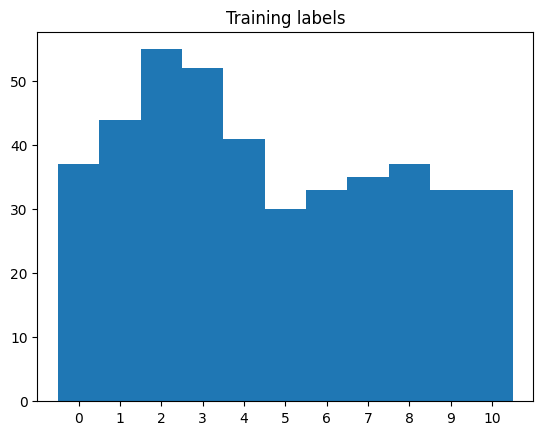

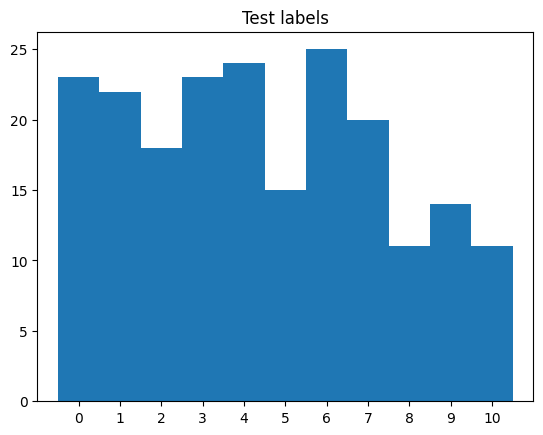

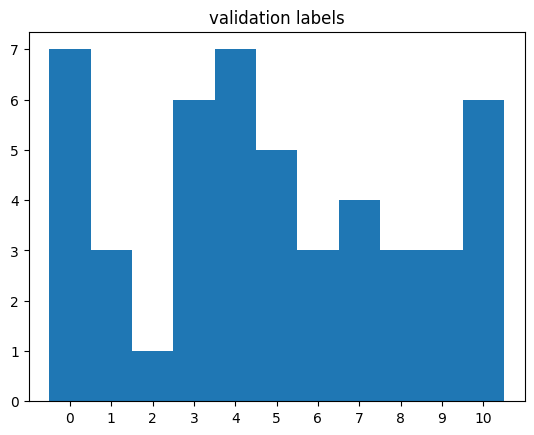

In [5]:
def label_dist_plot(data, label):
  plt.figure()
  
  data = [int(x) for x in data]
  _, _, _ = plt.hist(data, bins=[0, 1, 2,3,4,5,6,7,8,9,10,11], align='left')
  plt.xticks(np.unique(data))
  plt.xlim(left=min(np.unique(data))-1, right=max(np.unique(data))+1)
  plt.title(label)
  plt.show()


label_dist_plot(y_train, 'Training labels')
label_dist_plot(y_test, 'Test labels')
label_dist_plot(y_val, 'validation labels')

In [42]:
print(y_train[:10])

['8' '0' '8' '7' '1' '0' '0' '7' '9' '0']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


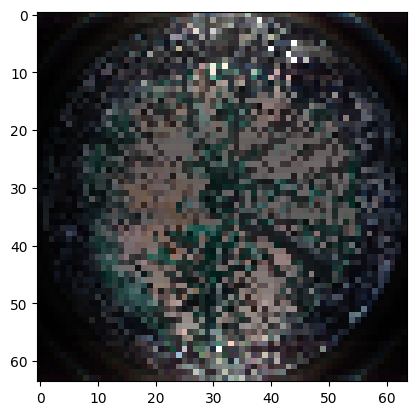

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


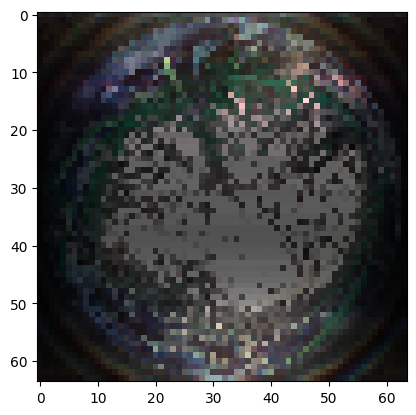

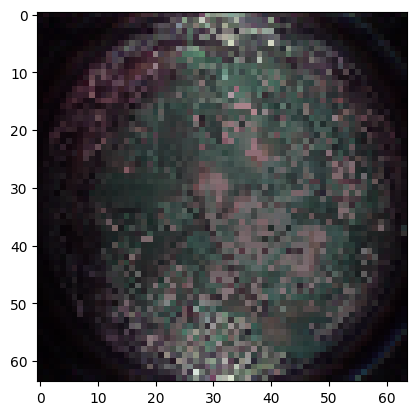

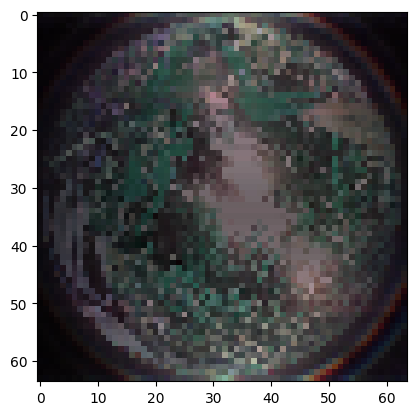

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


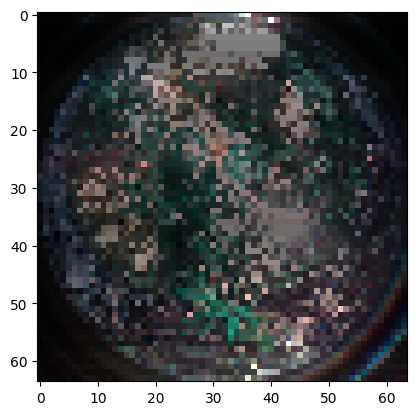

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


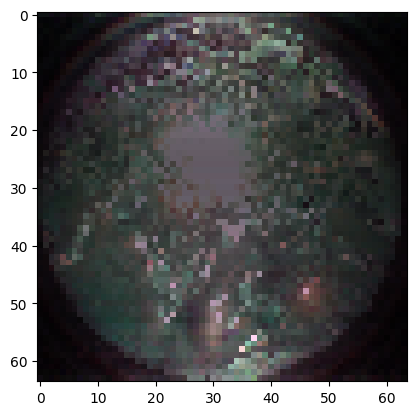

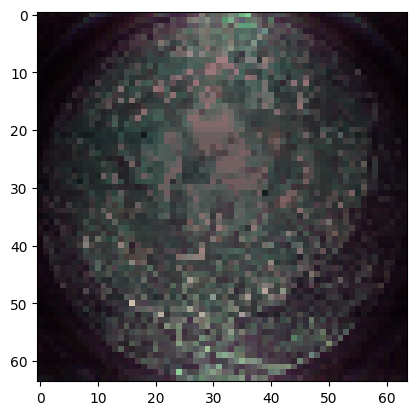

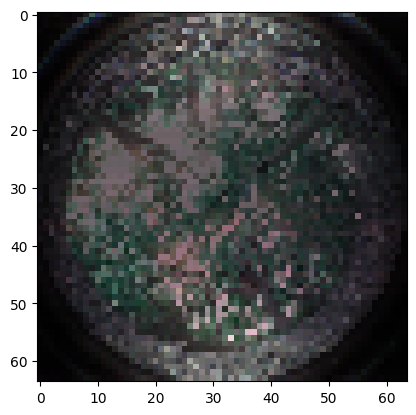

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


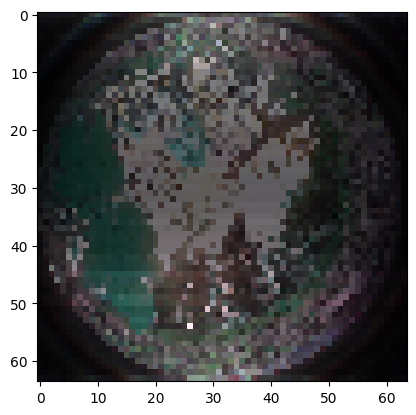

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


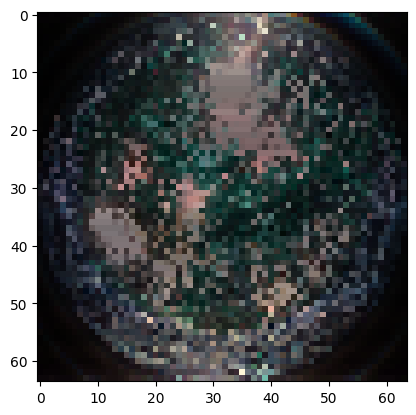

In [35]:

for i in range(10):
    tenso = tensoring(x_train[i])
    tenso = tenso.squeeze()
    tenso= tenso.permute(1, 2, 0)    ######### <<--------- The change
    tenso = np.array(tenso.cpu()) * 2

    #img = cv2.imread(tenso)
    #print(img.shape)

    #tenso = tenso.reshape(32, 32, 3)
    plt.imshow(tenso, cmap=plt.get_cmap('viridis'))
    plt.show()

(2880, 2880, 3)


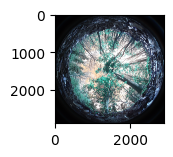

(2880, 2880, 3)


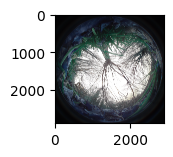

(2880, 2880, 3)


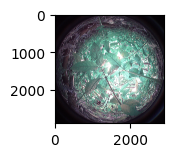

(2880, 2880, 3)


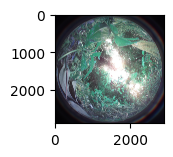

(2880, 2880, 3)


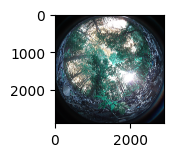

(2880, 2880, 3)


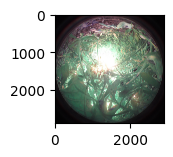

(2880, 2880, 3)


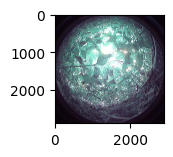

(2880, 2880, 3)


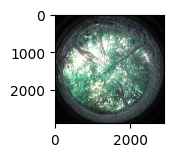

(2880, 2880, 3)


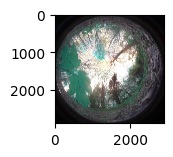

In [20]:
# look at imgs

for i in range(9):  
  plt.subplota(330 + 1 + i)
  img = cv2.imread(x_train[i])
  print(img.shape)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.show()
    


In [19]:
def tensoring(input):
        input = cv2.imread(input)
        input = cv2.resize(input, (64, 64))
        input = input.astype('float32')
        #input = input/255
        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = img_tensor.permute(2, 0, 1)    ######### <<--------- The change
        img_tensor = img_tensor.reshape(1, 3, 64, 64)
        img_tensor = img_tensor.to(device)

        return img_tensor


In [7]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:1 device


In [8]:
def label_tensor_float(lab):
    lab = int(lab)
    label = torch.tensor(lab)
    label = label.to(torch.float32)
    label = label.to(device)
    return label
#IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`)
#and integer or boolean arrays are valid indices

def label_oh_tf(lab): 
    num_classes = 11
    one_hot = np.zeros(num_classes)
    lab = int(lab)
    one_hot[lab] = 1
    label = torch.tensor(one_hot)
    label = label.to(torch.float32)
    label = label.to(device) #
    return label
    
    

In [9]:
# Define model - copy of what worked on MNIST
class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True 
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5), # [256, 128, 3, 3], expected input[1, 64, 9, 9]
          )
        
        self.linear_1 = nn.Sequential(    #1x16384 and 4096x100)
            nn.Linear(16384, 100), 
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(100,11),
            nn.Softmax(), 
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      #print('conv x', x.shape)
      x = self.linear_1(x)
      #print('lin1 x', x)
      return x
        


In [10]:
# train loop
def train_loop(model, x_train, y_train, epoch, optimizer, loss_fn):
  model = model
  x_train = x_train
  y_train = y_train

  model.train()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0
    
  total_samples = len(x_train)

  for idx, img in enumerate(x_train):
    
      tense = tensoring(img)
      #print(tense.shape)
        
      """
      img = np.array(tense.to('cpu').squeeze()[i])
      print(img.shape)
      plt.subplot(330 + 1)
      plt.imshow(img, cmap=plt.get_cmap('gray'))
      plt.show()
      """
   
      prediction = model.forward(tense)
      label = label_oh_tf(y_train[idx])
       
      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          print(f'\n ########################### HIT ###########################  -- {idx} / {total_samples} \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass
    
      total_count+=1

      #print(prediction, '\n Prediction:  ', prediction.argmax()) 
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

  return current_loss, predict_list, num_correct, model, optimizer


    


In [11]:
# validation loop

def validation_loop(model, x_val, y_val, epoch, loss_fn):
  model = model
  x_val = x_val
  y_val = y_val

  model.eval()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0

  for idx, img in enumerate(x_val):
    
      tense_img = tensoring(img)  
      prediction = model.forward(tense_img)
      label = label_oh_tf(y_val[idx]) 
    
      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          #print('\n ########################### HIT ########################### \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass
      total_count+=1

      #print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()

  return current_loss, predict_list, num_correct


    


In [12]:
t_loss_list = []
t_predict_list =[]
t_accuracy_list = []

v_loss_list = []
v_predict_list =[]
v_accuracy_list = []

total_epochs = 0

title = f'forest_v13_MnistStyleVGG_HyperSweep'
save_dict = {'Run' : title,
            'Current_Epoch': 0}

In [127]:
# training

from IPython.display import clear_output

fresh_model = True

"""if model == None or fresh_model == True:
    model =vgg16TorchNet().to(device)"""
    #model = model.to(device)
model =vgg16TorchNet().to(device)
epochs=1

learning_rate= 1e-4   #5e-5
loss_fn = torch.nn.CrossEntropyLoss()   #torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)#, weight_decay=1e-5)
optim= 'Adam'

"""
print('\n')
print('LR: ', learning_rate)
print('optimiser: ', optimizer)
print('loss fn: ', loss_fn)
"""
for epoch in range(epochs):
  #print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
  print('EPOCH: ', epoch)
  print('----------------------')
  print(' \n                  TRAINING... \n')
  print('----------------------')
  train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
  t_loss_list.append(train_loss)
  t_predict_list.append(train_predict_loss)
  t_accuracy_list.append(train_num_correct / len(y_train))


  print('----------------------')
  print(' \n                  VALIDATION... \n')
  print('----------------------')
  val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
  v_loss_list.append(val_loss)
  v_predict_list.append(val_predict_loss)
  v_accuracy_list.append(val_num_correct/ len(y_val))


  total_epochs += 1 ### Total epochs is from a previous save


  save_dict['Current Epoch'] = total_epochs
  save_dict['model.state_dict'] = model.state_dict()
  save_dict['training_samples'] = len(x_train)
  save_dict['validation_samples'] = len(x_val)
  save_dict['t_loss_list'] = t_loss_list
  save_dict['t_predict_list'] = t_predict_list
  save_dict['t_accuracy_list'] = t_accuracy_list
  save_dict['v_loss_list'] = v_loss_list
  save_dict['v_predict_list'] = v_predict_list
  save_dict['v_accuracy_list'] = v_accuracy_list
  #save_dict['epochCount']+=1 Now using current_epoch above

  if epoch == epochs-1:  ### Mabs change this to something like epoch == epochs, so that it only saves the final?
      version = f'extra64lay_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}'

      with open(f'{save_location}_Cifar_mnistarch_epoch{epoch}_{date}_{version}.pkl', 'wb') as f:
        pickle.dump(save_dict, f) 



  clear_output()

    


In [18]:
# Hyperparameter sweep

##### remember to make the pickle folder before running!
##### adapt train loopppp

import pickle
from IPython.display import clear_output
full_label = y_train

def hyperparameter_sweep():
    # a function to loop through hyperparameters for finding the best ones for certain architecture
    
    epochs = 30
    
    lr_list = [1e-6, 5e-3, 5e-4, 1e-4, 1e-5] #1e-7, 1e-6, #1e-7,1e-6,1e-5,1e-4,1e-3,1e-2, 5e-4, 5e-3, 5e-2
    optimiser_list = ['Adam'] #, 'SGD'
    lossfn_list = [torch.nn.MSELoss()] #, torch.nn.NLLLoss(), , 
    
    best_optim = None
    best_lossfn = None
    best_lr = 0
    best_valaccuracy = 0
    best_epoch = 0
    
    for loss_fn in lossfn_list:
        for optim in optimiser_list:
            for learning_rate in lr_list:
            
            
                
                model = vgg16TorchNet().to(device) #model architecture
                optim_list=[]
                if optim =='Adam':
                    optimizer1 = torch.optim.Adam(model.parameters(), lr=learning_rate)
                    optimizer2 = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)
                    optim_list.append(optimizer1)
                    optim_list.append(optimizer2)
                """elif optim == 'SGD':
                    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)"""
                for optimizer in optim_list:
                    t_loss_list = []
                    t_predict_list =[]
                    t_accuracy_list = []

                    v_loss_list = []
                    v_predict_list =[]
                    v_accuracy_list = []

                    total_epochs = 0
                    title = f'forest_HyperParameterSweep_{str(learning_rate)}_{str(optimizer)}_{str(loss_fn)}lecun'
                    save_dict = {'Run' : title,
                                'Current_Epoch': 0}

                    print('\n')
                    print('LR: ', learning_rate)
                    print('optimiser: ', optim)
                    print('loss fn: ', loss_fn)

                    for epoch in range(epochs):
                      print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
                      print('EPOCH: ', epoch)
                      print('----------------------')
                      print(' \n                  TRAINING... \n')
                      print('----------------------')
                      train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
                      t_loss_list.append(train_loss)
                      t_predict_list.append(train_predict_loss)
                      t_accuracy_list.append(train_num_correct / len(y_train))


                      print('----------------------')
                      print(' \n                  VALIDATION... \n')
                      print('----------------------')
                      val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
                      v_loss_list.append(val_loss)
                      v_predict_list.append(val_predict_loss)
                      v_accuracy_list.append(val_num_correct/ len(y_val))

                      if v_accuracy_list[-1] > best_valaccuracy:
                            best_valaccuracy = v_accuracy_list[-1]
                            best_optim = optimizer
                            best_lossfn = loss_fn
                            best_lr = learning_rate
                            best_epoch = epoch

                      total_epochs += 1 ### Total epochs is from a previous save


                      save_dict['Current Epoch'] = total_epochs
                      save_dict['model.state_dict'] = model.state_dict()
                      save_dict['training_samples'] = len(x_train)
                      save_dict['validation_samples'] = len(x_val)
                      save_dict['t_loss_list'] = t_loss_list
                      save_dict['t_predict_list'] = t_predict_list
                      save_dict['t_accuracy_list'] = t_accuracy_list
                      save_dict['v_loss_list'] = v_loss_list
                      save_dict['v_predict_list'] = v_predict_list
                      save_dict['v_accuracy_list'] = v_accuracy_list
                      #save_dict['epochCount']+=1 Now using current_epoch above

                      final_train_acc = round(t_accuracy_list[-1],3)
                      final_val_acc = round(v_accuracy_list[-1],3)
                      version =f'forest_v14_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}_Acc_{final_train_acc}_{final_val_acc}_schholcompREF'

                      if epoch==epochs-1:
                          with open(save_location+f'forest_HyperparameterSweep_{date}_{version}.pkl', 'wb') as f:
                            pickle.dump(save_dict, f)



                      clear_output()
                     

    print('Top results from hyperparameter sweep:')
    print()
    print(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch)
    return best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch, v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list



best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch,v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list = hyperparameter_sweep()


Top results from hyperparameter sweep:

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
) MSELoss() 0.0001 0.5416666666666666 19


In [17]:
print(t_loss_list)

## Graphs

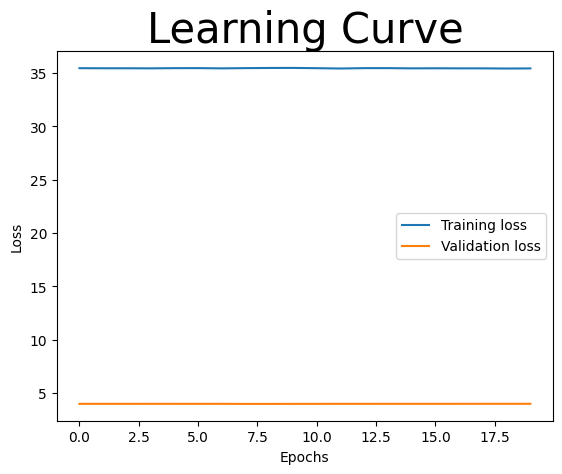

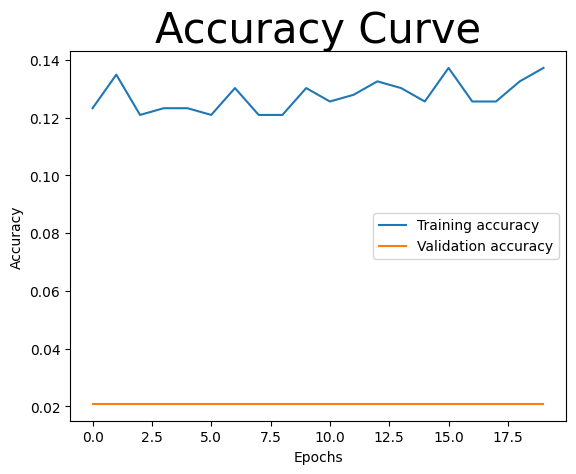

In [17]:
# learning curve
# Import date class from datetime module
import datetime

execution = datetime.datetime.now()


def learning_curve(v_loss_list, t_loss_list):
  plt.title(label="Learning Curve", fontsize =30)
  plt.plot(range(len(t_loss_list)), t_loss_list, label ='Training loss')
  plt.plot(range(len(v_loss_list)), v_loss_list, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  #plt.yscale("log")
  plt.legend()
  plt.savefig(save_location+'learningCuve'+title+str(execution)+'.png') #run_name
  plt.show()
  # save figs

 
def accuracy_curve(v_accuracy_list, t_accuracy_list):
  plt.title(label="Accuracy Curve", fontsize =30)
  plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
  plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(save_location+'accuracyCuve'+title+'.png', format='png')
  plt.show()
 

learning_curve(v_loss_list, t_loss_list)

accuracy_curve(v_accuracy_list, t_accuracy_list)

In [18]:
## Test loop

model.eval()

predict_list = []
total_count = 0
num_correct = 0
current_loss = 0

for idx, img in enumerate(x_test):

  tense_img = tensoring(img)  
  prediction = model.forward(tense_img)
  label = label_oh_tf(y_test[idx]) 

  loss = loss_fn(prediction, label)
  predict_list.append(prediction.argmax())

  print('\n ---------------------------------------------------------------')
  print('             Epoch: ', epoch, '  Sample: ', idx)

  if prediction.argmax() == label.argmax():
      print('\n ########################### HIT ########################### \n')
      num_correct +=1
  else:
    print('\n ########################### MISS ########################### \n')

  total_count+=1

  print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
  print('Label: ',label.argmax())
  #print('Loss: ', loss.item())
  print('---------------------------------------------------------------')
  print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

  current_loss += loss.item()


print('/////////////////////////////////////////////////')

print('Testing Results')

print('/////////////////////////////////////////////////')

print('Correct Answers: ', num_correct)
print('Total Questions: ', total_count)
print('% Accuracy: ', 100 * (num_correct / total_count))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

tensor(7)

 Training Confusion matrix


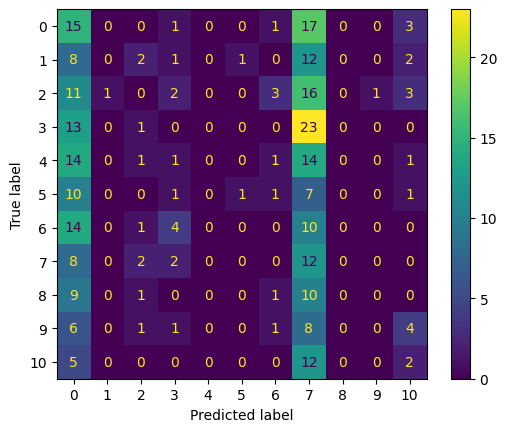


 Validation Confusion matrix


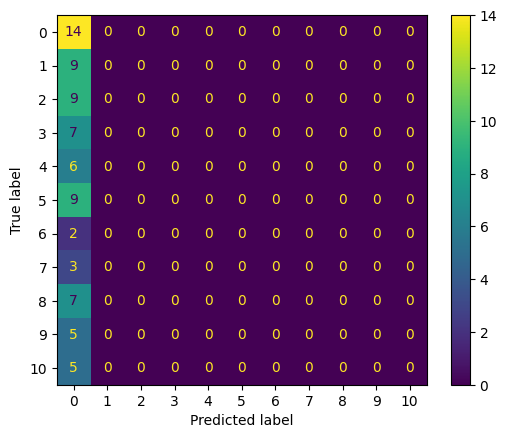

In [98]:
# confusion matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


epoch_in_question =-1

Y_train= [int(y) for y in y_train]
Y_val= [int(v) for v in y_val]

final_t_pred =[x.cpu() for x in t_predict_list[epoch_in_question]]
final_v_pred =[x.cpu() for x in v_predict_list[epoch_in_question]]

t_predict_list_test = [x.cpu() for j in t_predict_list for x in j]

print(t_predict_list_test[0])
print('\n Training Confusion matrix')
train_epoch_matrix = confusion_matrix(Y_train, final_t_pred)
disp= ConfusionMatrixDisplay(train_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9,10])
disp.plot()
plt.show()

print('\n Validation Confusion matrix')
val_epoch_matrix = confusion_matrix(Y_val, final_v_pred)
disp= ConfusionMatrixDisplay(val_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9,10])
disp.plot()
plt.show()


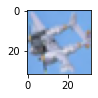

NameError: name 'model' is not defined

In [34]:
# seeing if validation works
i = 144
test_im = x_val[i]
test_y = y_val[i]
  
plt.subplot(330 + 1 + 2)
plt.imshow(test_im, cmap=plt.get_cmap('gray'))
plt.show()



tense_im = tensoring(test_im)
prediction_test = model.forward(tense_im)


num_classes = 10
one_hot = np.zeros(num_classes)
one_hot[test_y] = 1


label = torch.tensor(one_hot)
label = label.to(torch.float32)

print(' \n Prediction:  ',prediction_test.argmax())
print('\n LabeL: ',label.argmax())

In [15]:
# load saved pickle model for graphs or further training

import pickle



#save_location = 'C:\\Users\\nn268\\Documents\\notebooks\\pickles\\190623'
#file_name = 'Cifar_epoch50_210623_CIFAR_v9_dropWD_tv_1e-07_Adam_MSELoss()schholcompREF.pkl' #Cifar_160623_CIFAR_v3_tv_1e-05_Adam_MSELoss()schholcompREF.pkl
file_name = 'TESESTESTCifar_epoch5_230623_extra64lay_epoch24_lr1e-06_Adam_CrossEntropyLoss().pkl'
model = vgg16TorchNet()


load_epoch= -1
#MNIST_Simple_3_layer_Antnet_Epoch_250523_24_0.05_ReLU_2linear.pkl

with open(save_location+f''+file_name, 'rb') as f:
    save_dict = pickle.load(f)

# Access dictionary elements
run_name = save_dict['Run'] 
total_epochs = save_dict['Current Epoch']
model_state_dict = save_dict['model.state_dict']
training_samples = save_dict['training_samples'] 
validation_samples = save_dict['validation_samples']

t_loss_list = save_dict['t_loss_list'] 
t_predict_list = save_dict['t_predict_list']
t_accuracy_list = save_dict['t_accuracy_list']

v_loss_list = save_dict['v_loss_list']
v_predict_list = save_dict['v_predict_list']  
v_accuracy_list = save_dict['v_accuracy_list']

# Load model state 
model.load_state_dict(model_state_dict) 

RuntimeError: Error(s) in loading state_dict for vgg16TorchNet:
	Missing key(s) in state_dict: "conv_layers.6.weight", "conv_layers.6.bias", "conv_layers.11.weight", "conv_layers.11.bias", "linear_1.4.weight", "linear_1.4.bias". 
	Unexpected key(s) in state_dict: "conv_layers.5.weight", "conv_layers.5.bias", "conv_layers.10.weight", "conv_layers.10.bias", "conv_layers.15.weight", "conv_layers.15.bias", "linear_1.5.weight", "linear_1.5.bias". 
	size mismatch for conv_layers.3.weight: copying a param with shape torch.Size([64, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv_layers.3.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for conv_layers.8.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for conv_layers.8.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for conv_layers.13.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).